In [1]:
! pip install pandas 
! pip install matplotlib
! pip install numpy
! pip install seaborn


In [2]:
! pip install scikit-learn

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier


In [4]:
df=pd.read_csv("gym_members_exercise_tracking.csv")

In [5]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [6]:
df.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')

In [7]:
df.shape

(973, 15)

In [8]:
df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [9]:
df.dtypes

Age                                int64
Gender                            object
Weight (kg)                      float64
Height (m)                       float64
Max_BPM                            int64
Avg_BPM                            int64
Resting_BPM                        int64
Session_Duration (hours)         float64
Calories_Burned                  float64
Workout_Type                      object
Fat_Percentage                   float64
Water_Intake (liters)            float64
Workout_Frequency (days/week)      int64
Experience_Level                   int64
BMI                              float64
dtype: object

In [10]:
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [11]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of      Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0     56    Male         88.3        1.71      180      157           60   
1     46  Female         74.9        1.53      179      151           66   
2     32  Female         68.1        1.66      167      122           54   
3     25    Male         53.2        1.70      190      164           56   
4     38    Male         46.1        1.79      188      158           68   
..   ...     ...          ...         ...      ...      ...          ...   
968   24    Male         87.1        1.74      187      158           67   
969   25    Male         66.6        1.61      184      166           56   
970   59  Female         60.4        1.76      194      120           53   
971   32    Male        126.4        1.83      198      146           62   
972   46    Male         88.7        1.63      166      146           66   

     Session_Duration (hours)  Calories_Burn

## Gender distribution

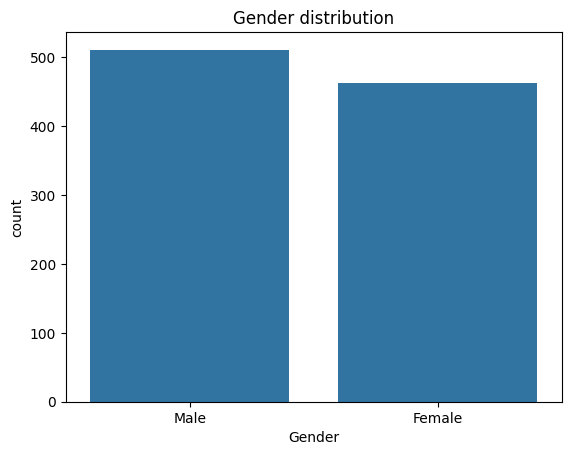

In [12]:
sns.countplot(x='Gender',data=df)
plt.title('Gender distribution')
plt.xlabel('Gender')
plt.ylabel('count')
plt.show()


## Age distributions

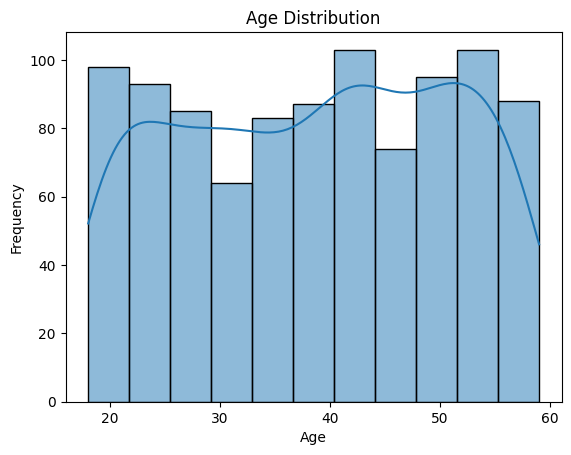

In [13]:
sns.histplot(df['Age'],kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## BMI distribution

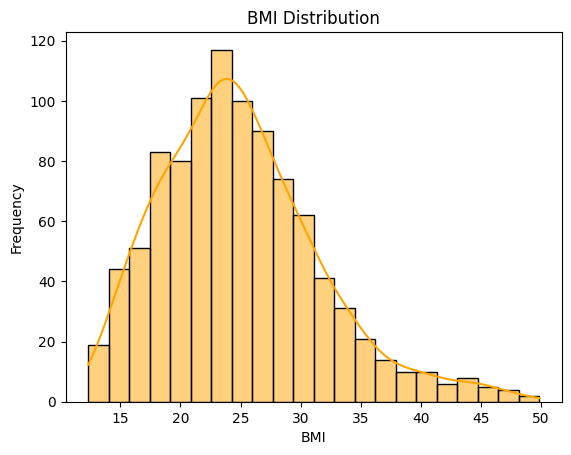

In [14]:

sns.histplot(df['BMI'], kde=True, color='orange')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()


## Workout types

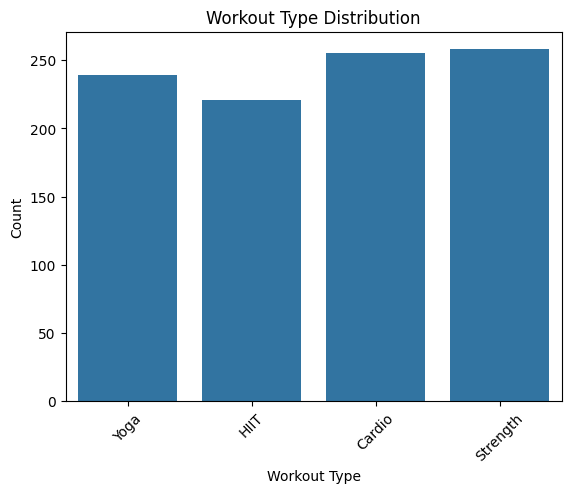

In [15]:
sns.countplot(x='Workout_Type', data=df)
plt.title('Workout Type Distribution')
plt.xlabel('Workout Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


## Calories burned vs workout duration

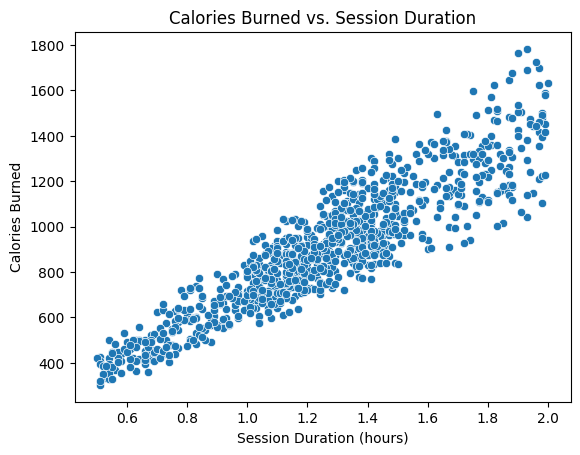

In [16]:
sns.scatterplot(x='Session_Duration (hours)',y='Calories_Burned',data=df)
plt.title('Calories Burned vs. Session Duration')
plt.xlabel('Session Duration (hours)')
plt.ylabel('Calories Burned')
plt.show()

## Analysis of Experience Level and Workout Frequency

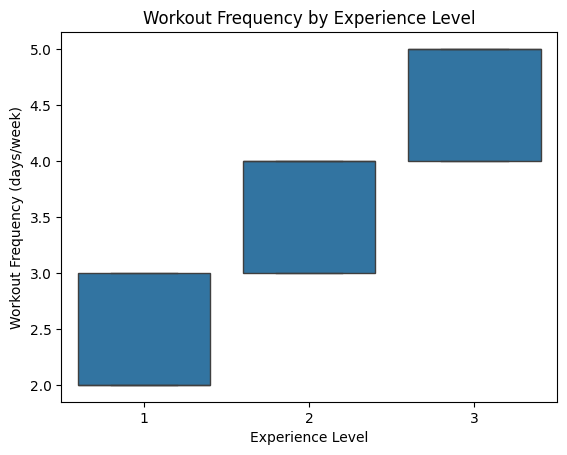

In [17]:
sns.boxplot(x='Experience_Level', y='Workout_Frequency (days/week)', data=df)
plt.title('Workout Frequency by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Workout Frequency (days/week)')
plt.show()

In [18]:
print("Available columns:", df.columns)

gender_columns = [col for col in df.columns if col.startswith('Gender_')]
workout_type_columns = [col for col in df.columns if col.startswith('Workout_Type_')]
experience_level_columns = [col for col in df.columns if col.startswith('Experience_Level_')]

# Combine selected columns
selected_features = gender_columns + workout_type_columns + experience_level_columns
print("Selected Features:", selected_features)

# Ensure selected features are used for the model
X = df[selected_features]
y = df['Calories_Burned']  # Example target variable

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Available columns: Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')
Selected Features: []


In [19]:
categorical_columns = ['Gender', 'Workout_Type', 'Experience_Level']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

numerical_features = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 
                      'Resting_BPM', 'Session_Duration (hours)', 'Fat_Percentage', 
                      'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'BMI']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Regression Setup: Predicting Calories_Burned
X_regression = df.drop(columns=['Calories_Burned'])
y_regression = df['Calories_Burned']

# Classification Setup: Predicting if Workout_Type is "Cardio" (example binary classification)
y_classification = df['Workout_Type_Yoga']  

# Train-test split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_regression, y_classification, test_size=0.2, random_state=42)

# Results dictionary
results = {}

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_reg, y_train_reg)
y_pred_reg = lr.predict(X_test_reg)
results['Linear Regression'] = mean_squared_error(y_test_reg, y_pred_reg)

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_clf, y_train_clf)
y_pred_clf = logreg.predict(X_test_clf)
results['Logistic Regression'] = accuracy_score(y_test_clf, y_pred_clf)

# Decision Tree (Regression)
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train_reg, y_train_reg)
y_pred_reg = dt_reg.predict(X_test_reg)
results['Decision Tree Regression'] = mean_squared_error(y_test_reg, y_pred_reg)

# Decision Tree (Classification)
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_clf, y_train_clf)
y_pred_clf = dt_clf.predict(X_test_clf)
results['Decision Tree Classification'] = accuracy_score(y_test_clf, y_pred_clf)

# Random Forest (Regression)
rf_reg = RandomForestRegressor(random_state=42, n_estimators=100)
rf_reg.fit(X_train_reg, y_train_reg)
y_pred_reg = rf_reg.predict(X_test_reg)
results['Random Forest Regression'] = mean_squared_error(y_test_reg, y_pred_reg)

# Random Forest (Classification)
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)
rf_clf.fit(X_train_clf, y_train_clf)
y_pred_clf = rf_clf.predict(X_test_clf)
results['Random Forest Classification'] = accuracy_score(y_test_clf, y_pred_clf)

# Support Vector Machines (Regression)
svr = SVR(kernel='linear')
svr.fit(X_train_reg, y_train_reg)
y_pred_reg = svr.predict(X_test_reg)
results['SVM Regression'] = mean_squared_error(y_test_reg, y_pred_reg)

# Support Vector Machines (Classification)
svc = SVC(kernel='linear')
svc.fit(X_train_clf, y_train_clf)
y_pred_clf = svc.predict(X_test_clf)
results['SVM Classification'] = accuracy_score(y_test_clf, y_pred_clf)

# K-Nearest Neighbors (Regression)
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_reg, y_train_reg)
y_pred_reg = knn_reg.predict(X_test_reg)
results['KNN Regression'] = mean_squared_error(y_test_reg, y_pred_reg)

# K-Nearest Neighbors (Classification)
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_clf, y_train_clf)
y_pred_clf = knn_clf.predict(X_test_clf)
results['KNN Classification'] = accuracy_score(y_test_clf, y_pred_clf)

# Print results
for model, score in results.items():
    print(f"{model}: {score}")

Linear Regression: 1659.2777383035902
Logistic Regression: 1.0
Decision Tree Regression: 4843.902564102564
Decision Tree Classification: 1.0
Random Forest Regression: 2254.5216923076923
Random Forest Classification: 1.0
SVM Regression: 2687.754143772089
SVM Classification: 1.0
KNN Regression: 13391.958769230769
KNN Classification: 0.8


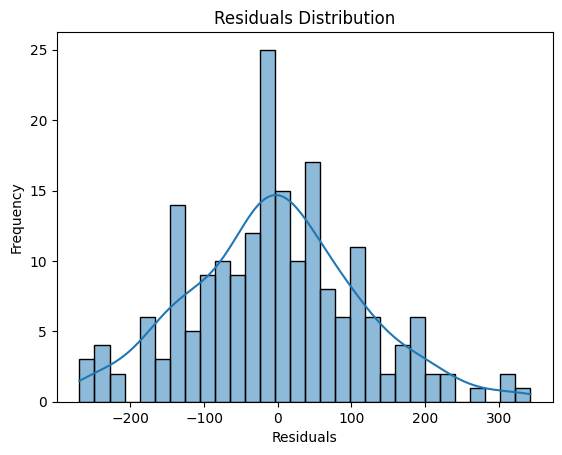

In [20]:

residuals = y_test - y_pred_reg
sns.histplot(residuals, kde=True, bins=30)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()
